In [6]:
import numpy as np
from filterpy.kalman import KalmanFilter
import stochastics.merton_jump as merton_jump
import sys
import numpy as np
from PyQt5 import QtWidgets, QtCore
import pyqtgraph as pg
import matplotlib.pyplot as plt

In [8]:

def apply_kalman_filter(data, process_variance=1e-5, measurement_variance=1e-1):
 
    # Initialize the Kalman Filter
    kf = KalmanFilter(dim_x=1, dim_z=1)
    kf.x = np.array([[data[0]]])  # Initial state
    kf.F = np.array([[1]])        # State transition matrix
    kf.H = np.array([[1]])        # Measurement function
    kf.P *= 1.0                   # Covariance matrix
    kf.R = measurement_variance   # Measurement noise
    kf.Q = process_variance       # Process noise

    # Apply the filter to the data
    filtered_data = []
    for z in data:
        kf.predict()
        kf.update(z)
        filtered_data.append(kf.x[0, 0])

    return np.array(filtered_data)



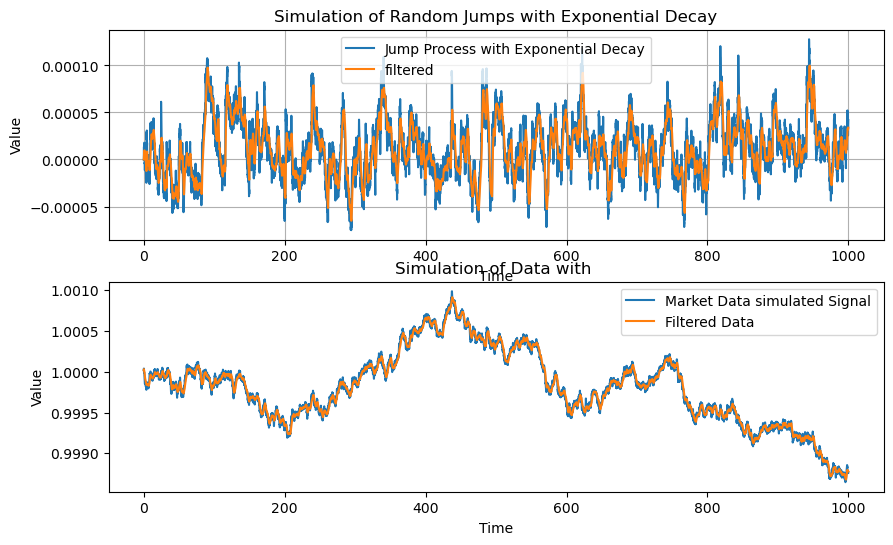

In [26]:

total_time = 1000  # Total simulation time
dt = 0.1          # Time step
half_life = 3     # decay 
jump_magnitude = 0.00005  # Magnitude of each jump
jump_probability = 0.005  # Probability of a jump occurring at each time step
decay_constant = np.log(2) / half_life

# Time array
time = np.arange(0, total_time, dt)
spread = np.zeros_like(time)

# Inventory simulator
for i in range(1, len(time)):
    if np.random.rand() < jump_probability:
        spread[i] += jump_magnitude
    spread[i] += spread[i-1] * np.exp(-decay_constant * dt) + np.random.rand()*0.00001 * (-1 if np.random.rand()>0.5 else 1)


merton = merton_jump.FX_merton([1,0.00000,0.00015,0.00005,0.000,0.001])
market_data = merton.build_series(10000)
market_data = market_data + spread

# Apply Kalman Filter
filtered_data = apply_kalman_filter(market_data, 1e-6, 1e-4)
filtered_data_sp = apply_kalman_filter(spread, 1e-6, 1e-4)


plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 1)
plt.plot(time, spread, label='Jump Process with Exponential Decay')
plt.plot(time, filtered_data_sp, label='filtered')
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Simulation of Random Jumps with Exponential Decay')
plt.legend()
plt.grid(True)

plt.subplot(2, 1, 2)
plt.plot(time,market_data, label='Market Data simulated Signal')
plt.plot(time,filtered_data, label='Filtered Data')
plt.title('Simulation of Data with ')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Value')
plt.show()


In [ ]:


class TimeSeriesSimulator(QtWidgets.QWidget):
    def __init__(self, data, filtered_data, spread, filtered_spread):
        super().__init__()


       # Data storage
        self.data = data
        self.filtered_data = filtered_data
        self.filtered_spread = filtered_spread
        self.spread = spread
        self.ptr = 0

        # Initialize UI components
        self.init_ui()

        # Timer for simulation updates
        self.timer = QtCore.QTimer()
        self.timer.timeout.connect(self.update_data)

 
        # Simulation control
        self.simulating = False

        # Arrow storage
        self.arrows = []

    def init_ui(self):
        # Layouts
        layout = QtWidgets.QVBoxLayout()

        # Plot Widget
        self.plot_widget = pg.PlotWidget()
        self.plot_curve = self.plot_widget.plot(self.data, pen='y')
        self.plot_curve = self.plot_widget.plot(self.filtered_data, pen='y')
        layout.addWidget(self.plot_widget)

        self.plot_widget = pg.PlotWidget()
        self.plot_curve = self.plot_widget.plot(self.spread, pen='y')
        self.plot_curve = self.plot_widget.plot(self.filtered_spread, pen='y')
        layout.addWidget(self.plot_widget)

        # Signal Display
        self.signal_label = QtWidgets.QLabel("Signal: Hold")
        layout.addWidget(self.signal_label)

        # Forecast Display
        self.forecast_label = QtWidgets.QLabel("Forecast: 0.00%")
        layout.addWidget(self.forecast_label)

        # Start and Stop Buttons
        self.start_button = QtWidgets.QPushButton("Start")
        self.start_button.clicked.connect(self.start_simulation)
        layout.addWidget(self.start_button)

        self.stop_button = QtWidgets.QPushButton("Stop")
        self.stop_button.clicked.connect(self.stop_simulation)
        layout.addWidget(self.stop_button)

        # Set layout
        self.setLayout(layout)
        self.setWindowTitle("Real-Time Time Series Simulator")

    def start_simulation(self):
        if not self.simulating:
            self.simulating = True
            self.timer.start(100)  # Update every 100 ms

    def stop_simulation(self):
        if self.simulating:
            self.simulating = False
            self.timer.stop()

    def update_data(self):
        # Simulate new data point (e.g., random walk)

        self.ptr += 1

        # Update plot
        self.plot_curve.setData(self.data[Math.max(0,self.ptr-1000):ptr], symbolBrush=('r'))
        self.plot_curve.setData(self.data_filtered[Math.max(0,self.ptr-1000):ptr], symbolBrush=('b'))

        # Generate trading signal and forecast
        self.generate_signal_and_forecast()




    def generate_signal_and_forecast(self):
        if self.ptr < 20:
            return

        if self.filtered_spread >0.00005:  # Strong Buy
            signal = "Strong Buy"
            self.add_arrow(self.ptr % 1000, self.data[self.ptr % 1000], 'green', 90)
        elif short_ma > long_ma:  # Buy
            signal = "Buy"
        elif short_ma <-0.0005:  # Strong Sell
            signal = "Strong Sell"
            self.add_arrow(self.ptr % 1000, self.data[self.ptr % 1000], 'red', -90)
        elif short_ma < long_ma:  # Sell
            signal = "Sell"
        else:
            signal = "Hold"

        # Placeholder for forecast calculation
        forecast = np.random.uniform(-5, 5)  # Random forecast between -5% and 5%

        # Update labels
        self.signal_label.setText(f"Signal: {signal}")
        self.forecast_label.setText(f"Forecast: {forecast:.2f}%")

    def add_arrow(self, x, y, color, angle):
        # Create an arrow
        arrow = pg.ArrowItem(pos=(x, y), angle=angle, brush=color)
        self.plot_widget.addItem(arrow)
        self.arrows.append(arrow)

        # Remove old arrows to prevent clutter
        if len(self.arrows) > 50:
            arrow_to_remove = self.arrows.pop(0)
            self.plot_widget.removeItem(arrow_to_remove)

if __name__ == "__main__":
    app = QtWidgets.QApplication(sys.argv)
    simulator = TimeSeriesSimulator()
    simulator.show()
    sys.exit(app.exec_())


In [ ]:
spike = 0
inventoryStart = time
signal_activated = false

for i in range(len(serie)):
    #step 1 triangle detection
    
    signal_activated = signal_activated or serie[i]>activatedThreshold

    #save inventory
    if(signal_activated and abs(serie[i])>spike) :
        spike = serie[i]

    # sign inventory - save mid max/min price
    if()
    
    # save the drop per sec



    